# Lesson 6 Assignment - Video Store Data Analysis

## Author - Studentname

### Background
Consider the data collected by a hypothetical video store for 50 regular customers.

This data consists of a table which, for each customer, records the following attributes:
* Gender
* Income
* Age
* Rentals - Total number of video rentals in the past year
* Avg. per visit - Average number of video rentals per visit during the past year
* Incidentals - Whether the customer tends to buy incidental items such as refreshments when renting a video
* Genre - The customer's preferred movie genre

## Tasks
Use the provided Video_Store.csv file, perform each of the following data preparation tasks and answer the related questions:

a) Split the age attribute into bins, using a bin depth of 4.

b) Use min-max normalization to transform the values of the Income attribute onto the range [0.0-1.0] and save results in new column. You'll need the income column again. 

c) Use z-score normalization to standardize the values of the Rentals attribute.

d) Discretize the (original) Income attribute based on the following categories: High = 60K+; Mid = 25K-59K; Low = less than $25K and keep in a separate column. Later you will compare which method has better results. 

e) Create a list of your categorical values so that you can encode them. 

f) On your categorical values, encode them and then perform basic correlation analysis among the attributes. Discuss your results by indicating any strong correlations (positive or negative) among pairs of attributes. You will need to construct a complete Correlation Matrix (Please read the brief document <a href="https://library.startlearninglabs.uw.edu/DATASCI420/PDF/DATASCI%20420%20Basic%20Correlation%20Analysis.pdf">Basic Correlation Analysis</a> for more detail). *Can you observe any "significant" patterns among groups of two or more variables? Explain.*

g) Use Pandas dataframe filtering to select all "good" customers with a high value for the Rentals attribute (a "good customer is defined as one with a Rentals value of greater than or equal to 30). From the subset, create a summary using the describe function (e.g., using means, medians, and/or other statistics). *What patterns do you see? Explain.*

**Note:** To know whether your observed patterns in the target group are significant, you need to compare them with the general population using the same metrics.

h) Suppose that because of the high profit margin, the store would like to increase the sales of incidentals. Based on your observations in previous parts discuss how this could be accomplished? (e.g., Should customers with specific characteristics be targeted? Should certain types of movies be preferred? etc.). Explain your answer based on your analysis of the data.


**Hints:**

- Review basic statistics for different attributes by using the pandas functions you learned about

- Consider discretizing the Age attribute.

- Make sure numerical variables are on the same scale

In [151]:
# Data set contains 600 rows and 11 columns.
URL = "https://library.startlearninglabs.uw.edu/DATASCI420/Datasets/Video_Store.csv"


In [152]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
% matplotlib inline
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
import seaborn as sns


In [153]:
video_Data = pd.read_csv(r"https://library.startlearninglabs.uw.edu/DATASCI420/Datasets/Video_Store.csv")
video_Data.head()

,Cust ID,Gender,Income,Age,Rentals,Avg Per Visit,Incidentals,Genre
0,1,M,45000,25,27,2.5,Yes,Action
1,2,F,54000,33,12,3.4,No,Drama
2,3,F,32000,20,42,1.6,No,Comedy
3,4,F,59000,70,16,4.2,Yes,Drama
4,5,M,37000,35,25,3.2,Yes,Action


In [154]:
video_Data.columns.tolist()

['Cust ID',
 'Gender',
 'Income',
 'Age',
 'Rentals',
 'Avg Per Visit',
 'Incidentals',
 'Genre']

In [155]:
video_Data.dtypes

Cust ID            int64
Gender            object
Income             int64
Age                int64
Rentals            int64
Avg Per Visit    float64
Incidentals       object
Genre             object
dtype: object

In [156]:
#convert columns to the appropriate type as necessary
video_Data["Income"] = video_Data["Income"].astype(float)
video_Data.dtypes

Cust ID            int64
Gender            object
Income           float64
Age                int64
Rentals            int64
Avg Per Visit    float64
Incidentals       object
Genre             object
dtype: object

In [157]:
# Check shape
print('The shape of our features is:',video_Data.shape)

The shape of our features is: (50, 8)


In [158]:
video_Data.describe()

,Cust ID,Income,Age,Rentals,Avg Per Visit
count,50.00000,50.000000,50.000000,50.000000,50.000000
mean,25.50000,42300.000000,31.560000,26.240000,2.748000
std,14.57738,21409.753642,12.000272,10.027635,0.898125
min,1.00000,1000.000000,15.000000,9.000000,1.100000
25%,13.25000,26750.000000,22.000000,19.000000,2.125000
50%,25.50000,41000.000000,30.000000,25.000000,2.750000
75%,37.75000,56750.000000,37.500000,32.750000,3.375000
max,50.00000,89000.000000,70.000000,48.000000,4.700000


In [159]:
#In mathematics, the gradient is a generalization of the usual concept of derivative of a function in one dimension to a function in several dimensions.
video_Data.style.background_gradient()

,Cust ID,Gender,Income,Age,Rentals,Avg Per Visit,Incidentals,Genre
0,1,M,45000,25,27,2.5,Yes,Action
1,2,F,54000,33,12,3.4,No,Drama
2,3,F,32000,20,42,1.6,No,Comedy
3,4,F,59000,70,16,4.2,Yes,Drama
4,5,M,37000,35,25,3.2,Yes,Action
5,6,M,18000,20,33,1.7,No,Action
6,7,F,29000,45,19,3.8,No,Drama
7,8,M,74000,25,31,2.4,Yes,Action
8,9,M,38000,21,18,2.1,No,Comedy
9,10,F,65000,40,21,3.3,No,Drama


In [160]:
video_Data.describe(include=["object"])

,Gender,Incidentals,Genre
count,50,50,50
unique,2,2,3
top,M,Yes,Drama
freq,26,26,20


In [161]:
# checking continuous data
continuous_vars = video_Data.describe().columns
continuous_vars

Index(['Cust ID', 'Income', 'Age', 'Rentals', 'Avg Per Visit'], dtype='object')

In [162]:
# check for nulls
video_Data[video_Data.isnull().any(axis=1)].head()

# No null values

,Cust ID,Gender,Income,Age,Rentals,Avg Per Visit,Incidentals,Genre


#### Split the age attribute into bins, using a bin depth of 4.

In [163]:
def data_binning(data):
    NB =4
    x= np.ravel(data)
    X= pd.DataFrame(x)
    bounds = np.linspace(np.min(x), np.max(x), NB + 1) 

    bounds = np.linspace(np.min(x), np.max(x), NB + 1)
    print (bounds)

    def bin(x, b): 
        nb = len(b)
        N = len(x)
        y = np.empty(N, int) 

        for i in range(1, nb):
            y[(x >= bounds[i-1])&(x < bounds[i])] = i

        y[x == bounds[-1]] = nb - 1
        return y

    bx = bin(x, bounds)
    print ("\n\nBinned variable x, for ", NB, "bins\n")
    print ("Bin boundaries: ", bounds)
    print ("Binned variable: ", bx)
    data = bx

In [164]:
data_binning(video_Data.Age)

[ 15.    28.75  42.5   56.25  70.  ]


Binned variable x, for  4 bins

Bin boundaries:  [ 15.    28.75  42.5   56.25  70.  ]
Binned variable:  [1 2 1 4 2 1 3 1 1 2 1 1 3 2 2 1 2 1 1 1 3 2 1 2 1 2 3 3 1 1 3 2 1 2 2 1 3
 2 2 1 2 1 1 1 2 3 2 3 1 1]


In [165]:
bins = [15,28.75,42.5, 56.25,70]
bin_names = ['Youth', 'YoungAdult', 'MiddleAge', 'Senior']

In [166]:
import pandas as pd
video_Data['new_Age'] = pd.cut(video_Data.Age, bins,labels=bin_names)

pd.value_counts(video_Data['new_Age'] )

Youth         22
YoungAdult    17
MiddleAge      9
Senior         1
Name: new_Age, dtype: int64

In [167]:
video_Data['new_Age'][0:5]

0         Youth
1    YoungAdult
2         Youth
3        Senior
4    YoungAdult
Name: new_Age, dtype: category
Categories (4, object): [Youth < YoungAdult < MiddleAge < Senior]

#### Use min-max normalization to transform the values of the Income attribute onto the range [0.0-1.0] and save results in new column. You'll need the income column again. 

In [168]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()

In [169]:
video_Data['Scaled_Income'] = mms.fit_transform(video_Data.Income.values.reshape(-1, 1))

In [170]:
video_Data['Scaled_Income'][0:5]

0    0.500000
1    0.602273
2    0.352273
3    0.659091
4    0.409091
Name: Scaled_Income, dtype: float64

In [171]:
#Another method 
min_sal = video_Data["Income"].min()
max_sal = video_Data["Income"].max()
min_sal, max_sal

(1000.0, 89000.0)

In [172]:
#Perform data transformations such as normalization by directly applying the operation to the Pandas Series:
norm_sal = (video_Data["Income"] - min_sal) / (max_sal-min_sal)
norm_sal.head()

0    0.500000
1    0.602273
2    0.352273
3    0.659091
4    0.409091
Name: Income, dtype: float64

#### Use z-score normalization to standardize the values of the Rentals attribute

In [173]:
from sklearn import preprocessing

In [174]:
X= video_Data.Rentals

In [175]:
# standardize the data attributes and cast to dataframe
video_Data['standardized_Rentals'] = pd.DataFrame(preprocessing.scale(X))
video_Data['standardized_Rentals'].head()

C:\Users\Gandhi\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


0    0.076560
1   -1.434493
2    1.587613
3   -1.031546
4   -0.124914
Name: standardized_Rentals, dtype: float64

In [176]:
#Another method
#Z-Score Standardization on Rentals

Rental_z = (video_Data["Rentals"] - video_Data["Rentals"].mean()) / video_Data["Rentals"].std()
Rental_z.head(5)

0    0.075791
1   -1.420076
2    1.571657
3   -1.021178
4   -0.123658
Name: Rentals, dtype: float64

In [177]:
video_Data["Rentals-Std"] = Rental_z
video_Data.head()

,Cust ID,Gender,Income,Age,Rentals,Avg Per Visit,Incidentals,Genre,new_Age,Scaled_Income,standardized_Rentals,Rentals-Std
0,1,M,45000.0,25,27,2.5,Yes,Action,Youth,0.500000,0.076560,0.075791
1,2,F,54000.0,33,12,3.4,No,Drama,YoungAdult,0.602273,-1.434493,-1.420076
2,3,F,32000.0,20,42,1.6,No,Comedy,Youth,0.352273,1.587613,1.571657
3,4,F,59000.0,70,16,4.2,Yes,Drama,Senior,0.659091,-1.031546,-1.021178
4,5,M,37000.0,35,25,3.2,Yes,Action,YoungAdult,0.409091,-0.124914,-0.123658


#### Discretize the (original) Income attribute based on the following categories: High = 60K+; Mid = 25K-59K; Low = less than $25K and keep in a separate column. Later you will compare which method has better results.

In [178]:
video_Data.Income.unique()

array([ 45000.,  54000.,  32000.,  59000.,  37000.,  18000.,  29000.,
        74000.,  38000.,  65000.,  41000.,  26000.,  83000.,  68000.,
        17000.,  36000.,   6000.,  24000.,  12000.,  47000.,  25000.,
         2000.,  79000.,   1000.,  56000.,  62000.,  57000.,  15000.,
        49000.,  23000.,  89000.,  50000.,  35000.,  69000.,  52000.,
        31000.])

In [179]:

bins = [1000, 25000, 59000, 100000]
bin_names = ['Low', 'Mid', 'High']

In [180]:
import pandas as pd
video_Data['new_Income'] = pd.cut(video_Data.Income, bins, labels=bin_names)

In [181]:
video_Data['new_Income'][5:10]

5     Low
6     Mid
7    High
8     Mid
9    High
Name: new_Income, dtype: category
Categories (3, object): [Low < Mid < High]

In [182]:
video_Data.head()

,Cust ID,Gender,Income,Age,Rentals,Avg Per Visit,Incidentals,Genre,new_Age,Scaled_Income,standardized_Rentals,Rentals-Std,new_Income
0,1,M,45000.0,25,27,2.5,Yes,Action,Youth,0.500000,0.076560,0.075791,Mid
1,2,F,54000.0,33,12,3.4,No,Drama,YoungAdult,0.602273,-1.434493,-1.420076,Mid
2,3,F,32000.0,20,42,1.6,No,Comedy,Youth,0.352273,1.587613,1.571657,Mid
3,4,F,59000.0,70,16,4.2,Yes,Drama,Senior,0.659091,-1.031546,-1.021178,Mid
4,5,M,37000.0,35,25,3.2,Yes,Action,YoungAdult,0.409091,-0.124914,-0.123658,Mid


In [183]:
vs_numeric = video_Data[["Age","Income","Rentals","Avg Per Visit"]]
vs_num_std = (vs_numeric - vs_numeric.mean()) / vs_numeric.std()
vs_num_std.head()

,Age,Income,Rentals,Avg Per Visit
0,-0.546654,0.126111,0.075791,-0.276131
1,0.119997,0.546480,-1.420076,0.725957
2,-0.963311,-0.481089,1.571657,-1.278218
3,3.203261,0.780018,-1.021178,1.616701
4,0.286660,-0.247551,-0.123658,0.503271


In [184]:
# another method z-score
zscore = lambda x: (x - x.mean()) / x.std()
vs_num_std = vs_numeric.apply(zscore)
vs_num_std.head()

,Age,Income,Rentals,Avg Per Visit
0,-0.546654,0.126111,0.075791,-0.276131
1,0.119997,0.546480,-1.420076,0.725957
2,-0.963311,-0.481089,1.571657,-1.278218
3,3.203261,0.780018,-1.021178,1.616701
4,0.286660,-0.247551,-0.123658,0.503271


In [185]:
video_Data.groupby("Gender").mean()

,Cust ID,Income,Age,Rentals,Avg Per Visit,Scaled_Income,standardized_Rentals,Rentals-Std
Gender,,,,,,,,
F,25.041667,43708.333333,34.375000,26.5,2.775000,0.485322,0.026192,0.025928
M,25.923077,41000.000000,28.961538,26.0,2.723077,0.454545,-0.024177,-0.023934


In [186]:
video_Data.groupby("Genre").mean()

,Cust ID,Income,Age,Rentals,Avg Per Visit,Scaled_Income,standardized_Rentals,Rentals-Std
Genre,,,,,,,,
Action,25.222222,32055.555556,23.944444,30.555556,2.627778,0.352904,0.434736,0.430366
Comedy,23.166667,45000.000000,31.916667,25.666667,2.641667,0.500000,-0.057756,-0.057175
Drama,27.150000,49900.000000,38.200000,22.700000,2.920000,0.555682,-0.356609,-0.353024


In [187]:
video_Data.groupby("Genre").describe().transpose()

Genre                             Action        Comedy         Drama
Age                  count     18.000000     12.000000     20.000000
                     mean      23.944444     31.916667     38.200000
                     std        5.875895     14.650215     10.714476
                     min       16.000000     15.000000     22.000000
                     25%       19.250000     20.750000     33.000000
                     50%       25.000000     27.500000     35.500000
                     75%       25.000000     46.000000     43.500000
                     max       35.000000     56.000000     70.000000
Avg Per Visit        count     18.000000     12.000000     20.000000
                     mean       2.627778      2.641667      2.920000
                     std        0.904112      0.967150      0.869119
                     min        1.400000      1.200000      1.100000
                     25%        2.125000      1.975000      2.600000
                     50%        2.450000      2.600000      3.200000
                     75%        2.900000      3.300000      3.500000
                     max        4.700000      4.100000      4.200000
Cust ID              count     18.000000     12.000000     20.000000
                     mean      25.222222     23.166667     27.150000
                     std       15.245271     11.637192     15.977863
                     min        1.000000      3.000000      2.000000
                     25%       13.000000     14.500000     13.250000
                     50%       27.500000     24.000000     25.500000
                     75%       34.750000     32.250000     43.250000
                     max       50.000000     39.000000     48.000000
Income               count     18.000000     12.000000     20.000000
                     mean   32055.555556  45000.000000  49900.000000
                     std    19675.222466  29073.574381  13474.732689
                     min     6000.000000   1000.000000  25000.000000
                     25%    17250.000000  27750.000000  41000.000000
                     50%    27500.000000  43500.000000  49500.000000
...                                  ...           ...           ...
Rentals              std        7.555459     10.662878     10.553622
                     min       17.000000     12.000000      9.000000
                     25%       26.000000     17.250000     16.000000
                     50%       30.000000     23.500000     21.000000
                     75%       36.000000     34.500000     25.000000
                     max       43.000000     42.000000     48.000000
Rentals-Std          count     18.000000     12.000000     20.000000
                     mean       0.430366     -0.057175     -0.353024
                     std        0.753464      1.063349      1.052454
                     min       -0.921454     -1.420076     -1.719249
                     25%       -0.023934     -0.896522     -1.021178
                     50%        0.374964     -0.273245     -0.522556
                     75%        0.973310      0.823724     -0.123658
                     max        1.671381      1.571657      2.170003
Scaled_Income        count     18.000000     12.000000     20.000000
                     mean       0.352904      0.500000      0.555682
                     std        0.223582      0.330382      0.153122
                     min        0.056818      0.000000      0.272727
                     25%        0.184659      0.303977      0.454545
                     50%        0.301136      0.482955      0.551136
                     75%        0.443182      0.761364      0.642045
                     max        0.829545      1.000000      0.886364
standardized_Rentals count     18.000000     12.000000     20.000000
                     mean       0.434736     -0.057756     -0.356609
                     std        0.761113      1.074145      1.063139
                     min       -0.930809     -1.434493     -1.73670

In [188]:
video_Data.columns

Index(['Cust ID', 'Gender', 'Income', 'Age', 'Rentals', 'Avg Per Visit',
       'Incidentals', 'Genre', 'new_Age', 'Scaled_Income',
       'standardized_Rentals', 'Rentals-Std', 'new_Income'],
      dtype='object')

In [189]:
video_Data_new = video_Data[[ 'Scaled_Income', 'standardized_Rentals',"Avg Per Visit"]]

Text(0.5,1,'Checking outliers for the columns')

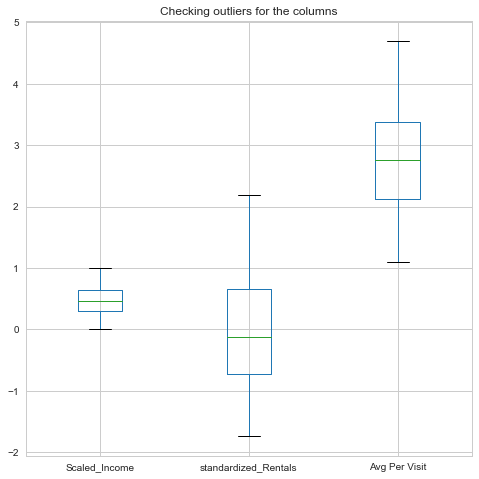

In [190]:
video_Data_new.plot(kind='box', figsize=[8,8])
plt.title('Checking outliers for the columns')

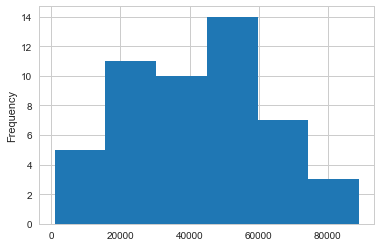

In [191]:
video_Data["Income"].plot(kind="hist", bins=6)

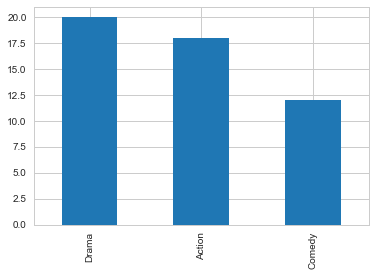

In [192]:
# Popular Genre
video_Data["Genre"].value_counts().plot(kind='bar')

Text(0.5,1,' Avg Per Visit vs. Rentals \n with New Income by color')

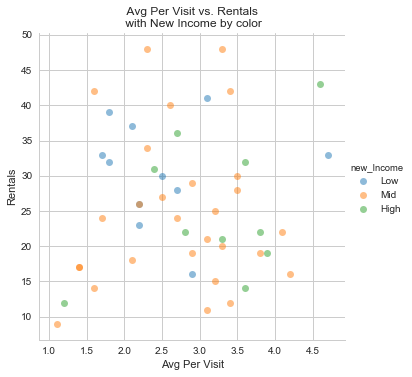

In [193]:
# better visibility
import seaborn as sns
sns.lmplot(x='Avg Per Visit', y='Rentals', 
           data = video_Data,
           hue = "new_Income",
           scatter_kws={'alpha':0.5},
           fit_reg = False)
plt.xlabel('Avg Per Visit')
plt.ylabel('Rentals')
plt.title(' Avg Per Visit vs. Rentals \n with New Income by color')

#### Create a list of your categorical values so that you can encode them

In [194]:
video_Data.head()

,Cust ID,Gender,Income,Age,Rentals,Avg Per Visit,Incidentals,Genre,new_Age,Scaled_Income,standardized_Rentals,Rentals-Std,new_Income
0,1,M,45000.0,25,27,2.5,Yes,Action,Youth,0.500000,0.076560,0.075791,Mid
1,2,F,54000.0,33,12,3.4,No,Drama,YoungAdult,0.602273,-1.434493,-1.420076,Mid
2,3,F,32000.0,20,42,1.6,No,Comedy,Youth,0.352273,1.587613,1.571657,Mid
3,4,F,59000.0,70,16,4.2,Yes,Drama,Senior,0.659091,-1.031546,-1.021178,Mid
4,5,M,37000.0,35,25,3.2,Yes,Action,YoungAdult,0.409091,-0.124914,-0.123658,Mid


In [195]:
video_Data.dtypes

Cust ID                    int64
Gender                    object
Income                   float64
Age                        int64
Rentals                    int64
Avg Per Visit            float64
Incidentals               object
Genre                     object
new_Age                 category
Scaled_Income            float64
standardized_Rentals     float64
Rentals-Std              float64
new_Income              category
dtype: object

In [196]:
object_vars = video_Data.describe(include =['object']).columns
object_vars

Index(['Gender', 'Incidentals', 'Genre'], dtype='object')

In [197]:
category_vars = video_Data.describe(include =['category']).columns
category_vars

Index(['new_Age', 'new_Income'], dtype='object')

#### On your categorical values, encode them and then perform basic correlation analysis among the attributes. Discuss your results by indicating any strong correlations (positive or negative) among pairs of attributes. You will need to construct a complete Correlation Matrix (Please read the brief document Basic Correlation Analysis for more detail). Can you observe any "significant" patterns among groups of two or more variables? Explain.

In [198]:
# encode your dataframe
video_Data1 = pd.get_dummies(video_Data, columns=['new_Age', 'new_Income'])
video_Data1.transpose()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
Cust ID,1,2,3,4,5,6,7,8,9,10,...,41,42,43,44,45,46,47,48,49,50
Gender,M,F,F,F,M,M,F,M,M,F,...,F,M,F,M,M,F,F,F,M,M
Income,45000,54000,32000,59000,37000,18000,29000,74000,38000,65000,...,50000,32000,49000,35000,56000,57000,69000,52000,31000,24000
Age,25,33,20,70,35,20,45,25,21,40,...,33,25,28,24,38,43,35,47,25,20
Rentals,27,12,42,16,25,33,19,31,18,21,...,17,26,48,24,30,9,22,14,42,33
Avg Per Visit,2.5,3.4,1.6,4.2,3.2,1.7,3.8,2.4,2.1,3.3,...,1.4,2.2,3.3,1.7,3.5,1.1,2.8,1.6,3.4,4.7
Incidentals,Yes,No,No,Yes,Yes,No,No,Yes,No,No,...,No,Yes,Yes,No,Yes,No,Yes,No,Yes,No
Genre,Action,Drama,Comedy,Drama,Action,Action,Drama,Action,Comedy,Drama,...,Drama,Action,Drama,Drama,Drama,Drama,Drama,Drama,Action,Action
Scaled_Income,0.5,0.602273,0.352273,0.659091,0.409091,0.193182,0.318182,0.829545,0.420455,0.727273,...,0.556818,0.352273,0.545455,0.386364,0.625,0.636364,0.772727,0.579545,0.340909,0.261364
standardized_Rentals,0.07656,-1.43449,1.58761,-1.03155,-0.124914,0.680981,-0.729335,0.479507,-0.830072,-0.527861,...,-0.930809,-0.0241768,2.19203,-0.225651,0.378771,-1.7367,-0.427124,-1.23302,1.58761,0.680981


In [199]:
continuous_vars = video_Data1.describe().columns
continuous_vars

Index(['Cust ID', 'Income', 'Age', 'Rentals', 'Avg Per Visit', 'Scaled_Income',
       'standardized_Rentals', 'Rentals-Std', 'new_Age_Youth',
       'new_Age_YoungAdult', 'new_Age_MiddleAge', 'new_Age_Senior',
       'new_Income_Low', 'new_Income_Mid', 'new_Income_High'],
      dtype='object')

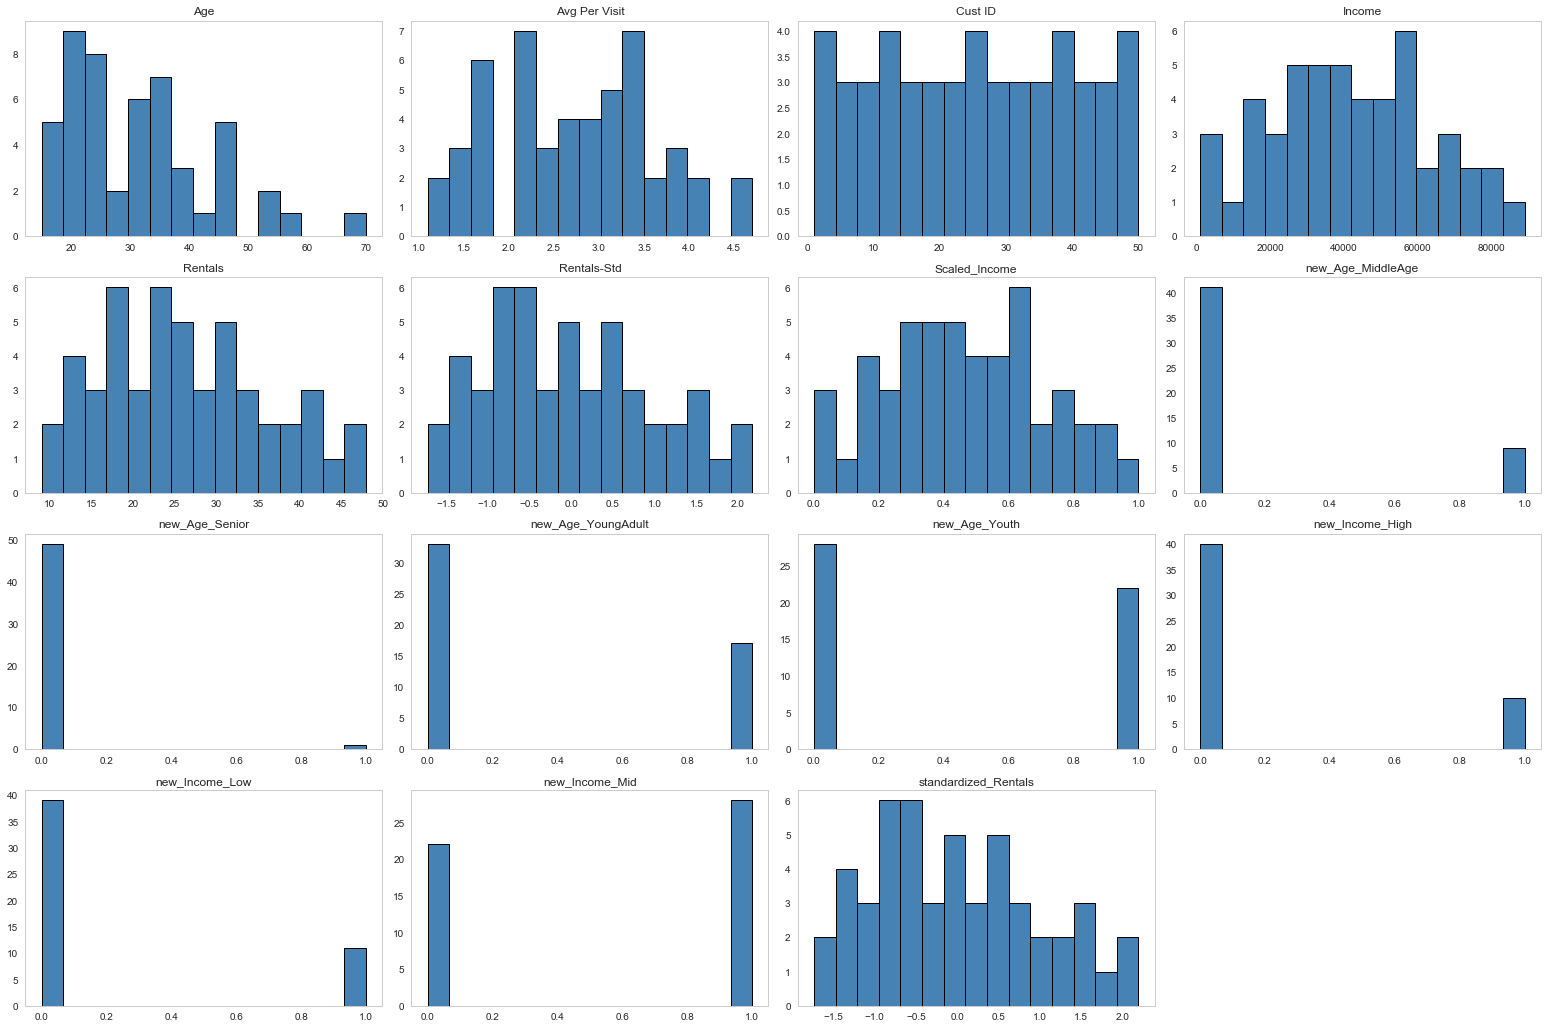

In [200]:
plt.rcParams['figure.figsize'] = (18,12)
video_Data1.hist(bins = 15, color = 'steelblue', edgecolor ='black', linewidth = 1.0, xlabelsize = 10, grid = False)
plt.tight_layout(rect =(0,0,1.2,1.2))
plt.show()

In [201]:
import pandas_profiling
pandas_profiling.ProfileReport(video_Data1)

Number of variables,18
Number of observations,50
Total Missing (%),0.0%
Total size in memory,4.7 KiB
Average record size in memory,96.6 B
Numeric,5
Categorical,3
Boolean,7
Date,0
Text (Unique),0
Rejected,3


In [202]:
# prints the report to an HTML file
pfr = pandas_profiling.ProfileReport(video_Data1)
pfr.to_file("video_Data1_report.html")

In [203]:
object_vars = video_Data1.describe(include =['object']).columns
object_vars


Index(['Gender', 'Incidentals', 'Genre'], dtype='object')

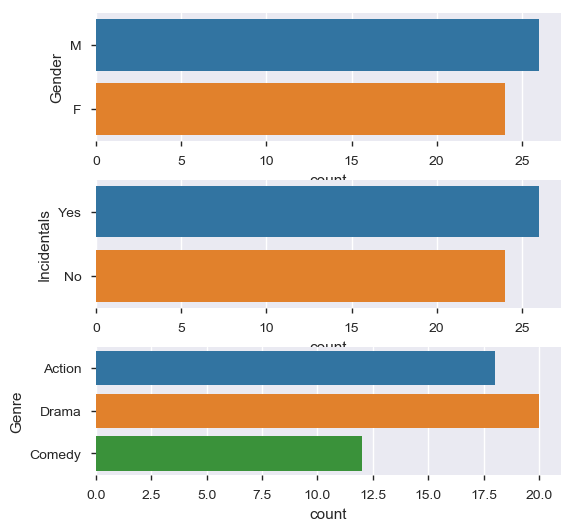

In [204]:
#Visualizing Distribution of Categorical Variables
# Count plots of categorical variables

fig, axes = plt.subplots(3,1, figsize=(6,6))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.7, hspace=0.3)

for i, ax in enumerate(axes.ravel()):
    if i > 7:
        ax.set_visible(False)
        continue
    sns.countplot(y = object_vars[i], data=video_Data1, ax=ax)
plt.show()

[Text(0.5,115.455,'Correlation map')]

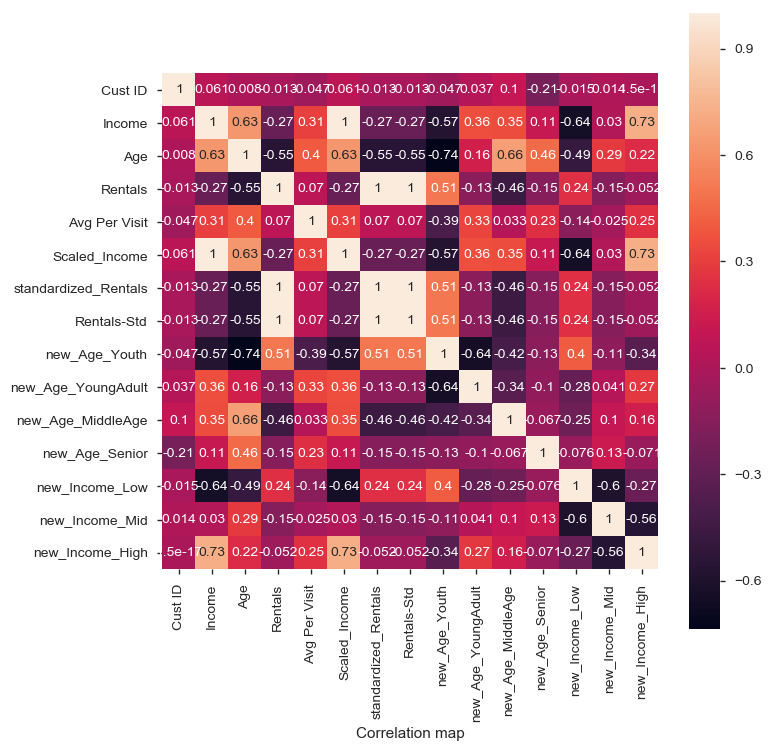

In [205]:
plt.figure(figsize=(8,8))
corr = video_Data1.corr()
ax =sns.heatmap(corr,vmax=1,square=True,annot=True)
ax.set(xlabel='Correlation map')

        index
Genre        
Action     18
Comedy     12
Drama      20


Text(0,0.5,'Number')

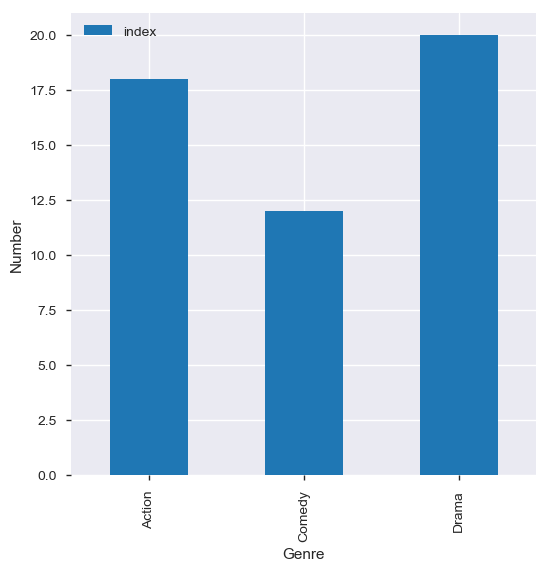

In [206]:
plt.rcParams["figure.figsize"] = (6,6)
video_Data1_indexed = video_Data1.reset_index()
print(pd.DataFrame(video_Data1_indexed.groupby(['Genre']).count()['index']))
pd.DataFrame(video_Data1_indexed.groupby(['Genre']).count()['index']).plot(kind='bar')
plt.ylabel('Number')

In [207]:
video_Data1.groupby(["Genre","Gender"])["Gender"].count()

Genre   Gender
Action  F          5
        M         13
Comedy  F          6
        M          6
Drama   F         13
        M          7
Name: Gender, dtype: int64

In [208]:
gg = pd.crosstab(video_Data1["Genre"], video_Data1["Gender"])
gg

Gender,F,M
Genre,,
Action,5,13
Comedy,6,6
Drama,13,7


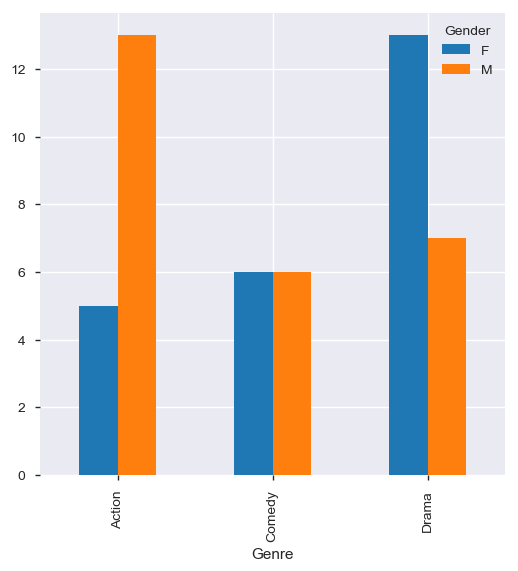

In [209]:
plt.show(gg.plot(kind="bar"))

In [210]:
gg["percent_female"] = gg["F"]/(gg["F"]+gg["M"])
gg

Gender,F,M,percent_female
Genre,,,
Action,5,13,0.277778
Comedy,6,6,0.500000
Drama,13,7,0.650000


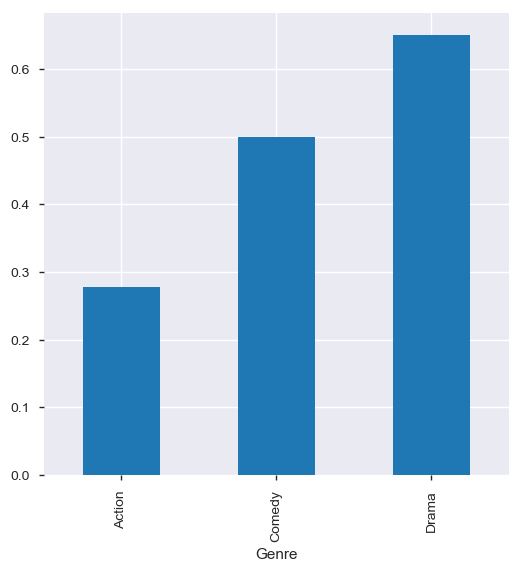

In [211]:
plt.show(gg["percent_female"].plot(kind="bar"))

In [212]:
pd.crosstab(video_Data1.Gender, video_Data1.Genre).apply(lambda r: r/r.sum(), axis=1)

Genre,Action,Comedy,Drama
Gender,,,
F,0.208333,0.250000,0.541667
M,0.500000,0.230769,0.269231


In [213]:
res = pd.crosstab(video_Data1.Gender, video_Data1.Genre)
res.sum(axis=1)

Gender
F    24
M    26
dtype: int64

In [214]:
pd.pivot_table(video_Data1, columns='Gender', index='Genre')

Age            Avg Per Visit              Cust ID             \
Gender          F          M             F         M          F          M   
Genre                                                                        
Action  24.600000  23.692308      2.460000  2.692308  23.800000  25.769231   
Comedy  28.666667  35.166667      2.766667  2.516667  25.166667  21.166667   
Drama   40.769231  33.428571      2.900000  2.957143  25.461538  30.285714   

              Income                  Rentals               ...     \
Gender             F             M          F          M    ...      
Genre                                                       ...      
Action  26400.000000  34230.769231  32.800000  29.692308    ...      
Comedy  34000.000000  56000.000000  30.166667  21.166667    ...      
Drama   54846.153846  40714.285714  22.384615  23.285714    ...      

       new_Age_Youth           new_Income_High           new_Income_Low  \
Gender             F         M               F         M              F   
Genre                                                                     
Action      0.600000  0.846154        0.000000  0.153846       0.400000   
Comedy      0.500000  0.333333        0.166667  0.500000       0.333333   
Drama       0.153846  0.142857        0.307692  0.000000       0.000000   

                 new_Income_Mid           standardized_Rentals            
Gender         M              F         M                    F         M  
Genre                                                                     
Action  0.461538       0.600000  0.384615             0.660834  0.347775  
Comedy  0.000000       0.500000  0.333333             0.395560 -0.511072  
Drama   0.142857       0.692308  0.857143            -0.388379 -0.297605  

[3 rows x 30 columns]

Text(0.5,1,'Checking proporsion of Income with Genre by Gender ')

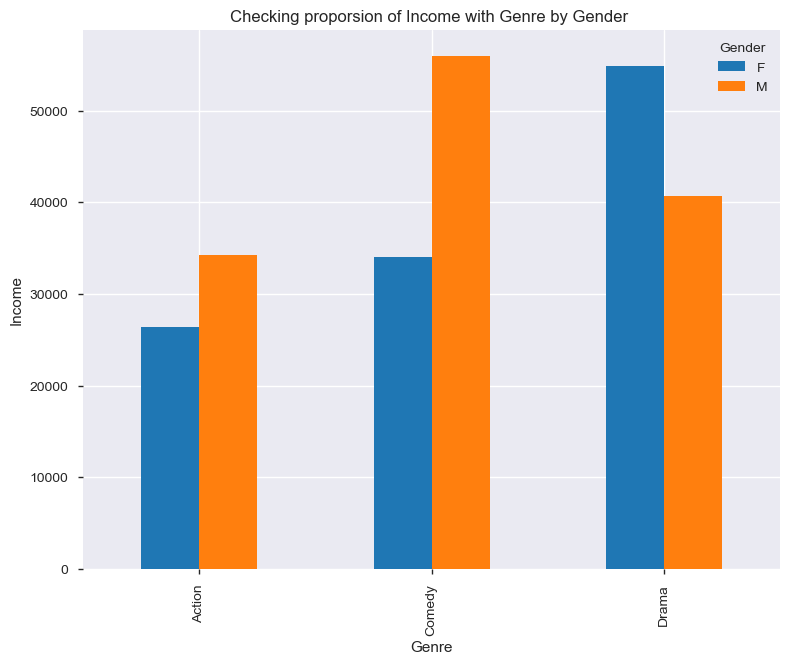

In [215]:
pd.pivot_table(video_Data1, values='Income', columns='Gender', index='Genre').plot.bar(figsize = (9,7))
plt.xlabel('Genre')
plt.ylabel('Income')
plt.title('Checking proporsion of Income with Genre by Gender ')

#### Based on the3 figures /results (below) following conclusions are made :

  * More than half of the female customers (54.2 %) preferred  to rent "Drama" movies

  * whereas, half of the male customers (50%) preferred  to rent "Action" movies

  * 72.2 % of the "Action" movies were rented by male customers

  * whereas, 65 % of the "Drama" movies were rented by female customers

  * the total male and female customer numbers are almost equivalent  ( 48 % Female vs 52 % male)

Text(0,0.5,'Age')

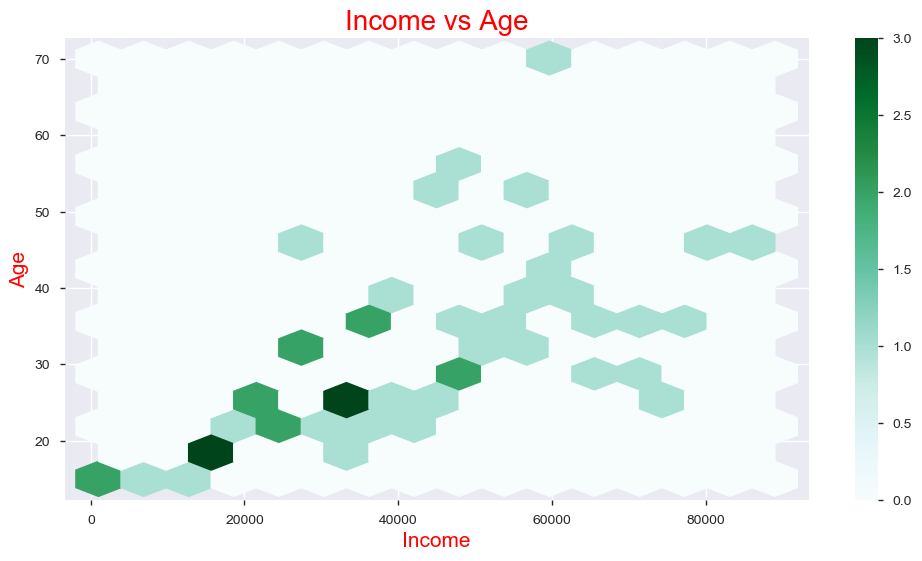

In [216]:
ax =plt.figure(figsize =(12,6)).gca()
video_Data1.plot.hexbin(x='Income',y='Age',gridsize =15,ax=ax)
ax.set_title('Income vs Age', fontsize =20, color = 'r') # Give the plot a main title
ax.set_xlabel('Income',fontsize =15, color = 'r')# Set text for y axis
ax.set_ylabel('Age', fontsize =15, color = 'r')

####  The customer's "Age" and "Income" have the highest positive correlation;i.e. as the customers' income increases as they get older.

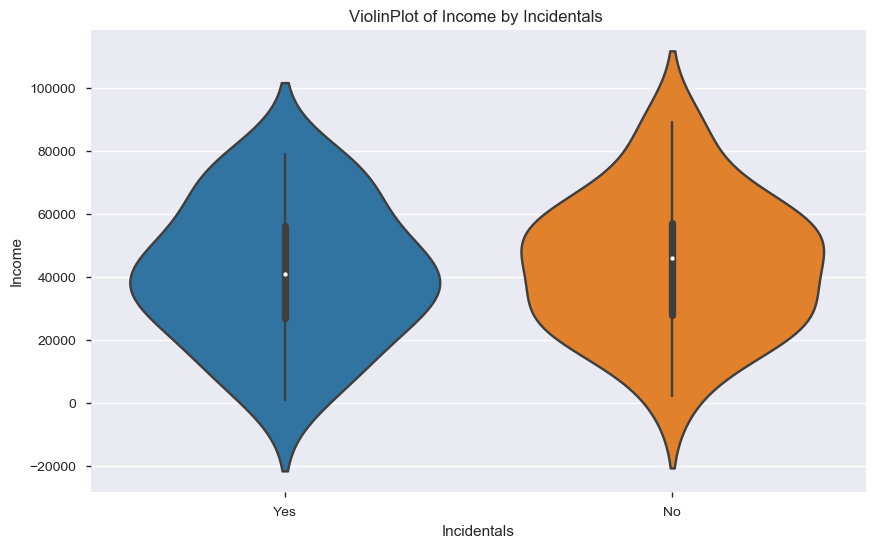

In [217]:
fig= plt.figure(figsize=(10,6))
ax=fig.gca()
sns.set_style("whitegrid")
sns.violinplot(x ='Incidentals',y ='Income', data=video_Data1 , ax=ax)
ax.set_title('ViolinPlot of Income by Incidentals ') # Give the plot a main title
ax.set_xlabel('Incidentals') # Set text for the x axis
ax.set_ylabel('Income')# Set text for y axis
plt.show()


Text(0.5,1,'fare_amountvs. tip_amount \n with Class by color')

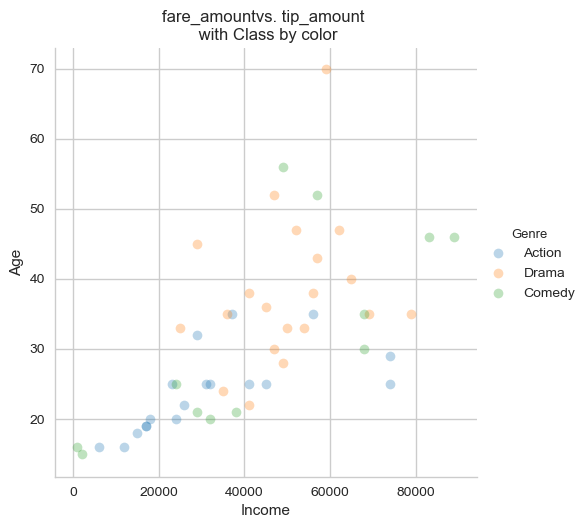

In [218]:
# better visibility
sns.lmplot(x='Income', y='Age', 
           data =video_Data1,
           hue = "Genre",
            scatter_kws={'alpha':0.3},
           fit_reg = False)
plt.xlabel('Income')
plt.ylabel('Age')
plt.title('fare_amountvs. tip_amount \n with Class by color')

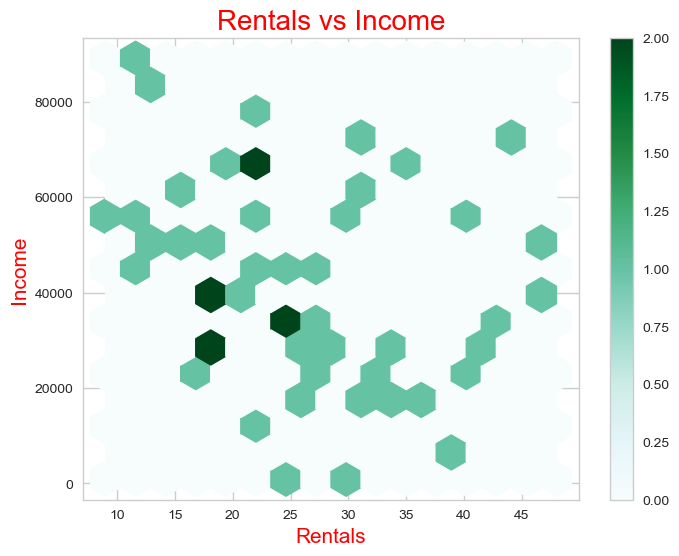

In [219]:
ax =plt.figure(figsize =(8,6)).gca()
video_Data1.plot.hexbin(x='Rentals',y='Income',gridsize =15,ax=ax)
ax.set_title('Rentals vs Income', fontsize =20, color = 'r') # Give the plot a main title
ax.set_xlabel('Rentals',fontsize =15, color = 'r')# Set text for y axis
ax.set_ylabel('Income', fontsize =15, color = 'r')
plt.show()

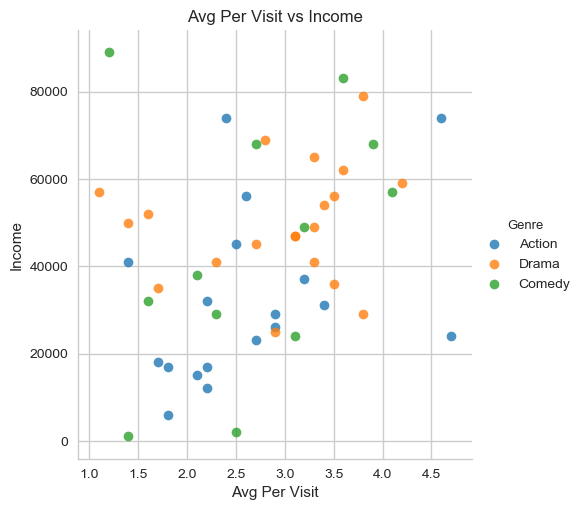

In [220]:
# creates the plot using
sex_income = sns.lmplot(x = 'Avg Per Visit', y = 'Income', data = video_Data1, hue = 'Genre', fit_reg=False)

# set title
sex_income.set(title = 'Avg Per Visit vs Income')
plt.show()

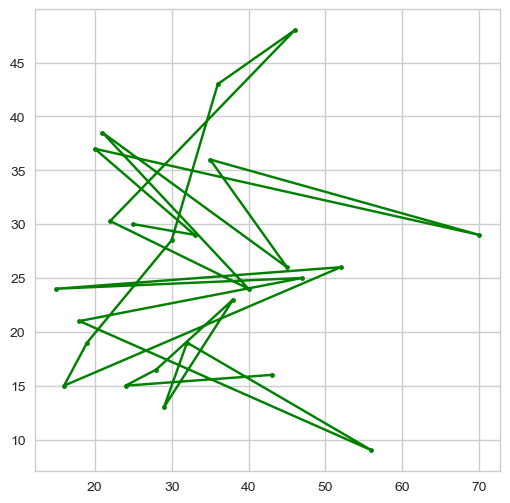

In [221]:
_ = plt.plot(video_Data1.Age.unique(),video_Data1.groupby(by=['Age'])['Rentals'].mean(), marker = '.',color = 'green')
_ = plt.plot()
plt.show()

#### Customer "Age" and "Rentals" have the highest negative correlation; i.e. as the customers gets older, the number of videos they rent decreases.

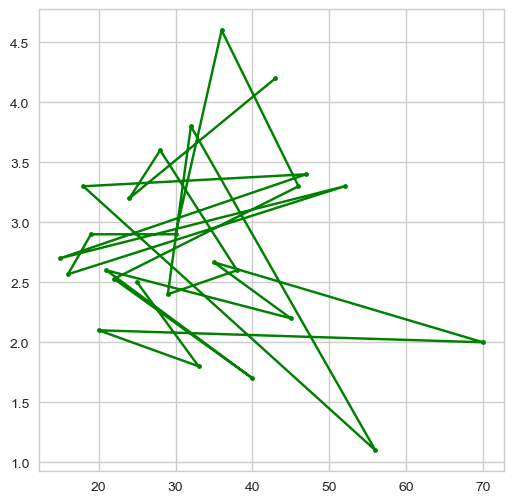

In [222]:
_ = plt.plot(video_Data1.Age.unique(),video_Data1.groupby(by=['Age'])['Avg Per Visit'].mean(), marker = '.',color = 'green')
_ = plt.plot()
plt.show()

####  Use Pandas dataframe filtering to select all "good" customers with a high value for the Rentals attribute (a "good customer is defined as one with a Rentals value of greater than or equal to 30). From the subset, create a summary using the describe function (e.g., using means, medians, and/or other statistics). What patterns do you see? Explain.

In [223]:
Good_customer = video_Data1.loc[video_Data1.Rentals >30,:]

In [224]:
Good_customer.head()

,Cust ID,Gender,Income,Age,Rentals,Avg Per Visit,Incidentals,Genre,Scaled_Income,standardized_Rentals,Rentals-Std,new_Age_Youth,new_Age_YoungAdult,new_Age_MiddleAge,new_Age_Senior,new_Income_Low,new_Income_Mid,new_Income_High
2,3,F,32000.0,20,42,1.6,No,Comedy,0.352273,1.587613,1.571657,1,0,0,0,0,1,0
5,6,M,18000.0,20,33,1.7,No,Action,0.193182,0.680981,0.674137,1,0,0,0,1,0,0
7,8,M,74000.0,25,31,2.4,Yes,Action,0.829545,0.479507,0.474688,1,0,0,0,0,0,1
10,11,F,41000.0,22,48,2.3,Yes,Drama,0.454545,2.192034,2.170003,1,0,0,0,0,1,0
14,15,M,68000.0,30,36,2.7,Yes,Comedy,0.761364,0.983192,0.973310,0,1,0,0,0,0,1


In [225]:
Good_customer.describe()

,Cust ID,Income,Age,Rentals,Avg Per Visit,Scaled_Income,standardized_Rentals,Rentals-Std,new_Age_Youth,new_Age_YoungAdult,new_Age_MiddleAge,new_Age_Senior,new_Income_Low,new_Income_Mid,new_Income_High
count,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.0000,16.0,16.000,16.000,16.000000
mean,25.937500,38750.000000,25.000000,38.187500,2.750000,0.428977,1.203554,1.191457,0.750000,0.187500,0.0625,0.0,0.375,0.375,0.250000
std,15.259833,22308.443842,7.745967,5.552402,0.966092,0.253505,0.559332,0.553710,0.447214,0.403113,0.2500,0.0,0.500,0.500,0.447214
min,3.000000,6000.000000,16.000000,31.000000,1.600000,0.056818,0.479507,0.474688,0.000000,0.000000,0.0000,0.0,0.000,0.000,0.000000
25%,14.000000,22500.000000,20.000000,33.000000,2.025000,0.244318,0.680981,0.674137,0.750000,0.000000,0.0000,0.0,0.000,0.000,0.000000
50%,26.500000,31500.000000,23.500000,38.000000,2.500000,0.346591,1.184666,1.172759,1.000000,0.000000,0.0000,0.0,0.000,0.000,0.000000
75%,37.000000,57500.000000,28.250000,42.000000,3.325000,0.642045,1.587613,1.571657,1.000000,0.000000,0.0000,0.0,1.000,1.000,0.250000
max,50.000000,74000.000000,47.000000,48.000000,4.700000,0.829545,2.192034,2.170003,1.000000,1.000000,1.0000,0.0,1.000,1.000,1.000000


In [226]:
# Calculate statistics of tips as this is out target variable
Good_customer_statistics = Good_customer.Income
Total_tip_amount =Good_customer.shape[0] # size of data

min_price = np.min(Good_customer_statistics) # minimum price
max_price = np.max(Good_customer_statistics) # maximum price
mean_price = np.mean(Good_customer_statistics) # mean price
median_price = np.median(Good_customer_statistics)# median price
std_price = np.std(Good_customer_statistics)# standard deviation
    
print ("Total Number:", Total_tip_amount)
print ("Minimum Income: {:,.2f}".format(min_price))
print ("Maximum Income: {:,.2f}".format(max_price))
print ("Mean Income: {:,.2f}".format(mean_price))
print ("Median Income: {:,.2f}".format(median_price))
print ("Standard Deviation: {:,.2f}".format(std_price))

Total Number: 16
Minimum Income: 6,000.00
Maximum Income: 74,000.00
Mean Income: 38,750.00
Median Income: 31,500.00
Standard Deviation: 21,600.06


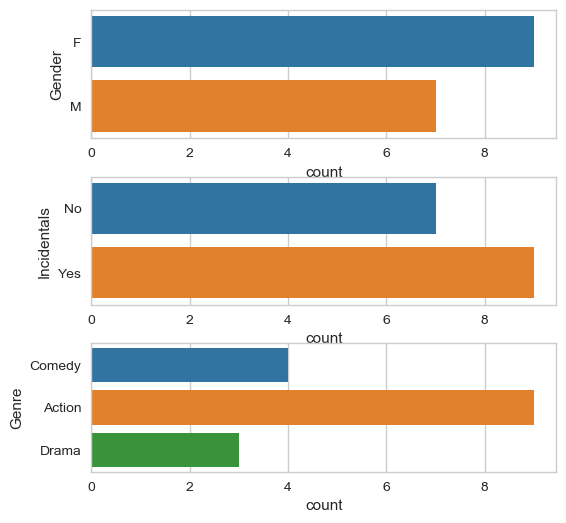

In [227]:
#Visualizing Distribution of Categorical Variables
# Count plots of categorical variables

fig, axes = plt.subplots(3,1, figsize=(6,6))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.7, hspace=0.3)

for i, ax in enumerate(axes.ravel()):
    if i > 7:
        ax.set_visible(False)
        continue
    sns.countplot(y = object_vars[i], data=Good_customer, ax=ax)
plt.show()

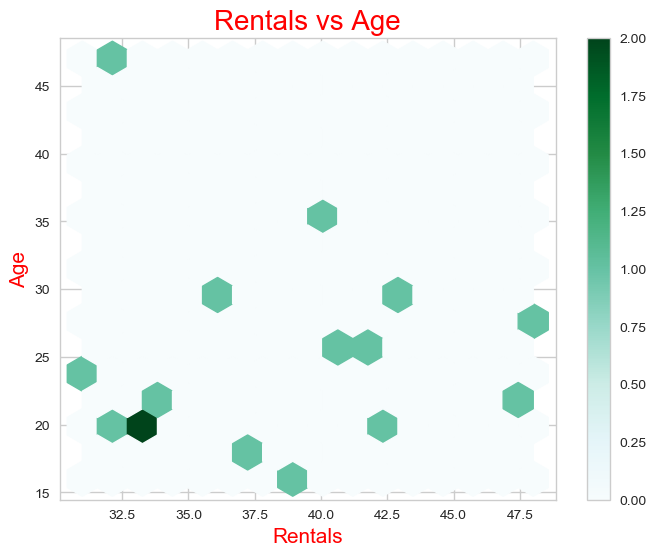

In [228]:
ax =plt.figure(figsize =(8,6)).gca()
Good_customer.plot.hexbin(x='Rentals',y='Age',gridsize =15,ax=ax)
ax.set_title('Rentals vs Age', fontsize =20, color = 'r') # Give the plot a main title
ax.set_xlabel('Rentals',fontsize =15, color = 'r')# Set text for y axis
ax.set_ylabel('Age', fontsize =15, color = 'r')
plt.show()

In [229]:
# Calculate statistics of tips as this is out target variable
Good_customer_statistics = Good_customer['Avg Per Visit']
Total_tip_amount =Good_customer.shape[0] # size of data

min_price = np.min(Good_customer_statistics) # minimum price
max_price = np.max(Good_customer_statistics) # maximum price
mean_price = np.mean(Good_customer_statistics) # mean price
median_price = np.median(Good_customer_statistics)# median price
std_price = np.std(Good_customer_statistics)# standard deviation
    
print ("Total Number:", Total_tip_amount)
print ("Minimum Visit: {:,.2f}".format(min_price))
print ("Maximum Visit: {:,.2f}".format(max_price))
print ("Mean Visit: {:,.2f}".format(mean_price))
print ("Median Visit: {:,.2f}".format(median_price))
print ("Standard Deviation: {:,.2f}".format(std_price))

Total Number: 16
Minimum Visit: 1.60
Maximum Visit: 4.70
Mean Visit: 2.75
Median Visit: 2.50
Standard Deviation: 0.94


#### From above graph, we can clearly see

* Senior citizens are not good customer. 

* Based on the given criteria, the "good" customer whose rents more than 30 movies in a year whose average salary is around "$30k" or higher

* He/she is in his/her "mid 20s"

* Visits to the store around "2 to 3" times a year or more 

* His/her preference is to rent **"Action" movies"**

* Can be a "Female" or "Male", female are more than male.

* The most clear conclusion was a good customer rents most likely an action movie (bar plots).



####  Suppose that because of the high profit margin, the store would like to increase the sales of incidentals. Based on your observations in previous parts discuss how this could be accomplished? (e.g., Should customers with specific characteristics be targeted? Should certain types of movies be preferred? etc.). Explain your answer based on your analysis of the data.

In [230]:
Action_customer = video_Data1.loc[video_Data1.Genre == 'Action',:]

In [231]:
Action_customer.head()

,Cust ID,Gender,Income,Age,Rentals,Avg Per Visit,Incidentals,Genre,Scaled_Income,standardized_Rentals,Rentals-Std,new_Age_Youth,new_Age_YoungAdult,new_Age_MiddleAge,new_Age_Senior,new_Income_Low,new_Income_Mid,new_Income_High
0,1,M,45000.0,25,27,2.5,Yes,Action,0.500000,0.076560,0.075791,1,0,0,0,0,1,0
4,5,M,37000.0,35,25,3.2,Yes,Action,0.409091,-0.124914,-0.123658,0,1,0,0,0,1,0
5,6,M,18000.0,20,33,1.7,No,Action,0.193182,0.680981,0.674137,1,0,0,0,1,0,0
7,8,M,74000.0,25,31,2.4,Yes,Action,0.829545,0.479507,0.474688,1,0,0,0,0,0,1
11,12,F,26000.0,22,29,2.9,Yes,Action,0.284091,0.278034,0.275239,1,0,0,0,0,1,0


In [232]:
print ("Good Customers:\n")
Good_customer.describe()


Good Customers:



,Cust ID,Income,Age,Rentals,Avg Per Visit,Scaled_Income,standardized_Rentals,Rentals-Std,new_Age_Youth,new_Age_YoungAdult,new_Age_MiddleAge,new_Age_Senior,new_Income_Low,new_Income_Mid,new_Income_High
count,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.0000,16.0,16.000,16.000,16.000000
mean,25.937500,38750.000000,25.000000,38.187500,2.750000,0.428977,1.203554,1.191457,0.750000,0.187500,0.0625,0.0,0.375,0.375,0.250000
std,15.259833,22308.443842,7.745967,5.552402,0.966092,0.253505,0.559332,0.553710,0.447214,0.403113,0.2500,0.0,0.500,0.500,0.447214
min,3.000000,6000.000000,16.000000,31.000000,1.600000,0.056818,0.479507,0.474688,0.000000,0.000000,0.0000,0.0,0.000,0.000,0.000000
25%,14.000000,22500.000000,20.000000,33.000000,2.025000,0.244318,0.680981,0.674137,0.750000,0.000000,0.0000,0.0,0.000,0.000,0.000000
50%,26.500000,31500.000000,23.500000,38.000000,2.500000,0.346591,1.184666,1.172759,1.000000,0.000000,0.0000,0.0,0.000,0.000,0.000000
75%,37.000000,57500.000000,28.250000,42.000000,3.325000,0.642045,1.587613,1.571657,1.000000,0.000000,0.0000,0.0,1.000,1.000,0.250000
max,50.000000,74000.000000,47.000000,48.000000,4.700000,0.829545,2.192034,2.170003,1.000000,1.000000,1.0000,0.0,1.000,1.000,1.000000


In [233]:
print ("Action Customers:\n") 
Action_customer.describe()

Action Customers:



,Cust ID,Income,Age,Rentals,Avg Per Visit,Scaled_Income,standardized_Rentals,Rentals-Std,new_Age_Youth,new_Age_YoungAdult,new_Age_MiddleAge,new_Age_Senior,new_Income_Low,new_Income_Mid,new_Income_High
count,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.0,18.0,18.000000,18.000000,18.000000
mean,25.222222,32055.555556,23.944444,30.555556,2.627778,0.352904,0.434736,0.430366,0.777778,0.222222,0.0,0.0,0.444444,0.444444,0.111111
std,15.245271,19675.222466,5.875895,7.555459,0.904112,0.223582,0.761113,0.753464,0.427793,0.427793,0.0,0.0,0.511310,0.511310,0.323381
min,1.000000,6000.000000,16.000000,17.000000,1.400000,0.056818,-0.930809,-0.921454,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000
25%,13.000000,17250.000000,19.250000,26.000000,2.125000,0.184659,-0.024177,-0.023934,1.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000
50%,27.500000,27500.000000,25.000000,30.000000,2.450000,0.301136,0.378771,0.374964,1.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000
75%,34.750000,40000.000000,25.000000,36.000000,2.900000,0.443182,0.983192,0.973310,1.000000,0.000000,0.0,0.0,1.000000,1.000000,0.000000
max,50.000000,74000.000000,35.000000,43.000000,4.700000,0.829545,1.688350,1.671381,1.000000,1.000000,0.0,0.0,1.000000,1.000000,1.000000


Only Youth and YouthAdults are watchign Action movies.

In [234]:
#The new table can be written into a file using to_csv method:
Action_customer.to_csv("Video_Store_Action_customer.csv", float_format="%1.2f")

Text(0,0.5,'Age')

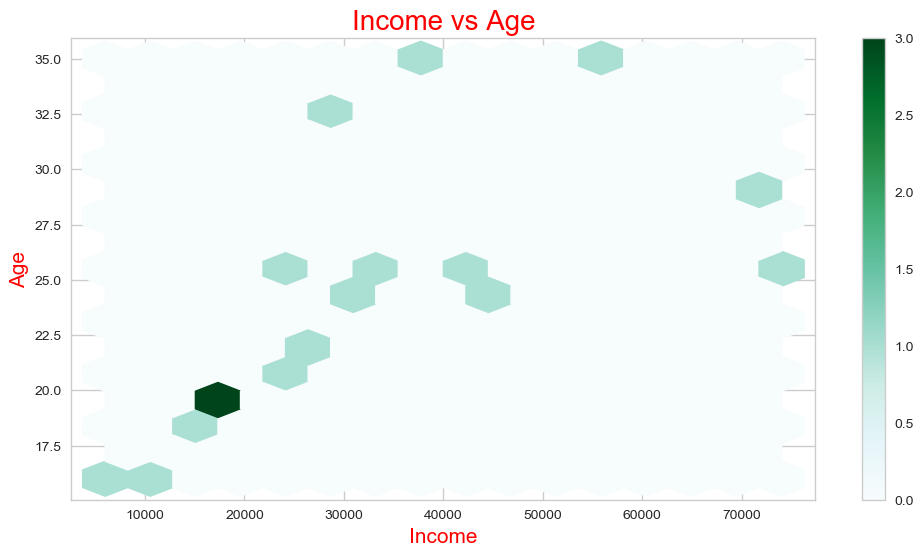

In [235]:
ax =plt.figure(figsize =(12,6)).gca()
Action_customer.plot.hexbin(x='Income',y='Age',gridsize =15,ax=ax)
ax.set_title('Income vs Age', fontsize =20, color = 'r') # Give the plot a main title
ax.set_xlabel('Income',fontsize =15, color = 'r')# Set text for y axis
ax.set_ylabel('Age', fontsize =15, color = 'r')

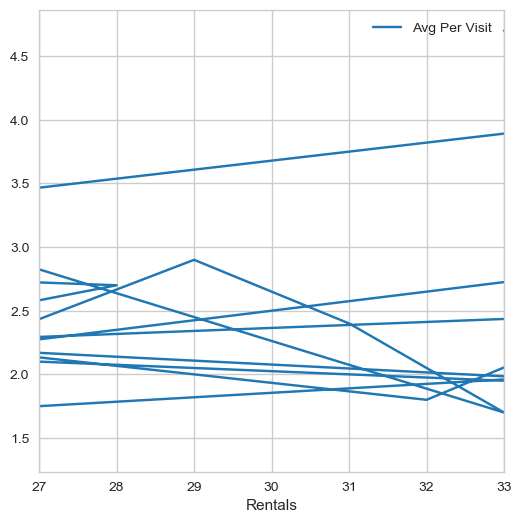

In [236]:
Action_customer.plot(x="Rentals", y="Avg Per Visit", kind="line")

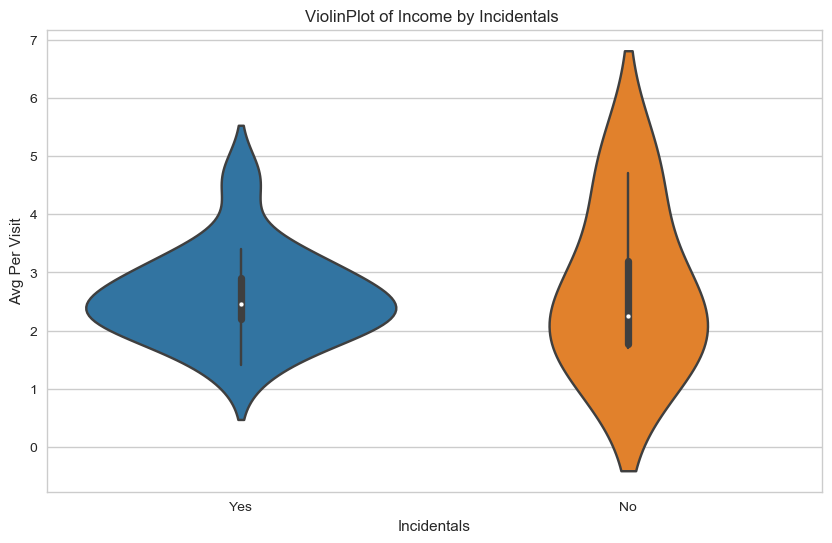

In [237]:
fig= plt.figure(figsize=(10,6))
ax=fig.gca()
sns.set_style("whitegrid")
sns.violinplot(x ='Incidentals',y ='Avg Per Visit', data=Action_customer , ax=ax)
ax.set_title('ViolinPlot of Income by Incidentals ') # Give the plot a main title
ax.set_xlabel('Incidentals') # Set text for the x axis
ax.set_ylabel('Avg Per Visit')# Set text for y axis
plt.show()


Text(0.5,1,'Avg Per Visit vs Age \n with Incidentals by color')

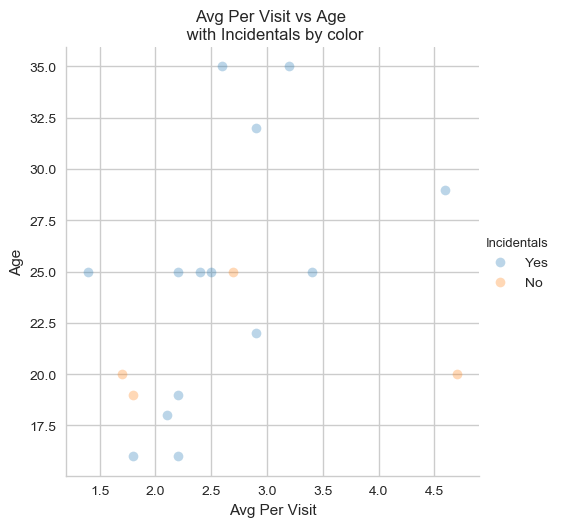

In [238]:
# better visibility
sns.lmplot(x='Avg Per Visit', y='Age', 
           data =Action_customer,
           hue = "Incidentals",
            scatter_kws={'alpha':0.3},
           fit_reg = False)
plt.xlabel('Avg Per Visit')
plt.ylabel('Age')
plt.title('Avg Per Visit vs Age \n with Incidentals by color')

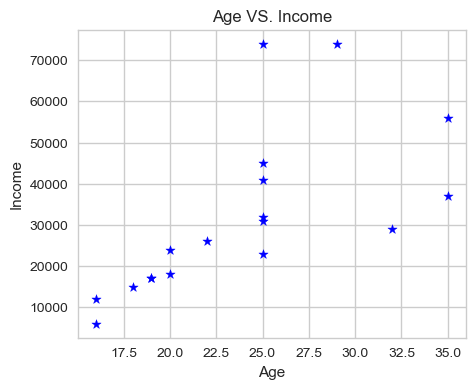

In [239]:
fig = plt.figure(figsize=(5, 4))
# Create an Axes object.
ax = fig.add_subplot(1,1,1) # one row, one column, first plot
# Plot the data.
ax.scatter(Action_customer['Age'], Action_customer['Income'], color="blue", marker="*")
# Add a title.
ax.set_title("Age VS. Income")
# Add some axis labels.
ax.set_xlabel("Age")
ax.set_ylabel("Income")
# Produce an image.
# fig.savefig("scatterplot.png")
plt.show()

Indeed, there does appear to be a positive correlation between Age and Income.

        index
Gender       
F           5
M          13


Text(0,0.5,'Number')

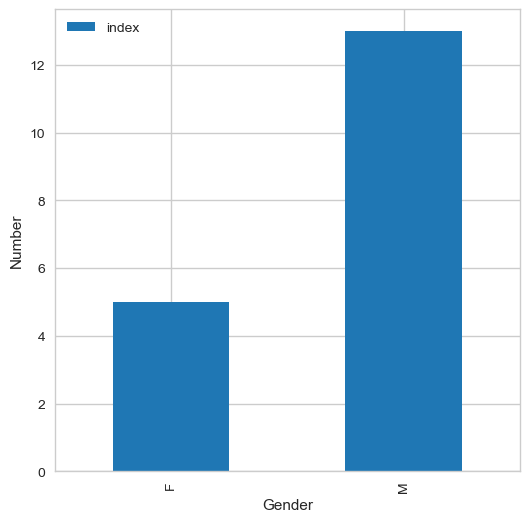

In [240]:
plt.rcParams["figure.figsize"] = (6,6)
Action_customer_indexed = Action_customer.reset_index()
print(pd.DataFrame(Action_customer_indexed.groupby(['Gender']).count()['index']))
pd.DataFrame(Action_customer_indexed.groupby(['Gender']).count()['index']).plot(kind='bar')
plt.ylabel('Number')

When we compared the summary of the two dataset, "Action" movie renter profile and good customer profile, are very similar. 

* Since an "Action" movie renter customer has an average salary is around "$32k" or higher

* Customers are in mid 20s

* Rents more than 30 movies in a year

* Visits the store around "2 to 3" times a year or more

* A good customer who rents Action movies most likely is a "Male" customer 

* And Customer will purchase other "incidentals" 

This data suggest that we need to target **Male** Customer with **Action Movies** to improve sale of incidentals.